# Table of Contents

- [Training](#train)
- [Exercises](#exercises)

# Housekeeping

- Some references for today
  - [Official pytorch tutorials](https://pytorch.org/tutorials/)
  - [Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)
  - [MIT Intro to Deep Learning](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=1) lecture video 
    (overview of machine learning and neural networks)
  - [Machine Learning Basics](https://www.deeplearningbook.org/contents/ml.html) from the Deep Learning Book 
    (especially section 5.2 on Capacity, Overfitting and Underfitting)
- Today's url 
  - https://git.io/ml2021-06
- Email if you need help with any of this!

# Some Preliminary Words on Training <a id="training" />

- In the last weeks, we learnt how to create neural networks in pytorch, and
  about some of the loss functions and optimizers we are able to use
- We saw its easy to take some data, throw a neural network at it and
  get it to train
- The hard part is developing a *good* model for the data
- Neural networks are prone to failure modes we'll discuss today
- Its important to understand these failure modes and build *robust*
  networks
- So, before moving onto the deep learning topics that we'll spend the
  rest of the course on, lets stop and talk a bit about training

# Generalization

- The goal of building a model on known inputs is that we want the
  model to *generalize* to unlabelled data
- That is, the data should correctly classify data from outside the training set
- If the model only works on datapoints in the training, its not much use
  - Imagine your a medical expert training a network to detect cancer,
    you build a cancer classifier which takes as inputs MRI scans. If
    it works correctly on images its seen in the training set
    (labelled by doctors based on patient outcomes), but randomly
    assigns labels to other images, its not useful to you at all, and
    could cost lives!
- The goal of this lesson is to figure out how best to train models
  that generalize

# Undertraining and Overtraining

- **Undertraining** is when a model isn't complex enough to be able to
  find the trends in the data
  - Imagine a regression task where the data follows a quadratic
    curve, fitting a linear function won't be able to capture all the information
- **Overtraining** is when a model is too complex and it begins fitting
  *fluctuations* in the labelled datapoints
  - We imagine theres some random errors in the data that can't be
    modelled, when a model is overtrained, it takes these random
    errors seriously and forms a model for them, which can't
    generalize to unseen data

As we increase the polynomial order of the fit function, we start to overtrain


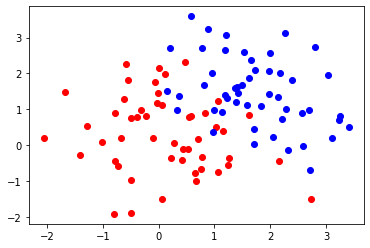

NameError: ignored

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
npoints = 50
red = torch.stack((torch.randn(npoints), torch.randn(npoints)), axis=1)
blue = torch.stack((torch.randn(npoints)+1.5, torch.randn(npoints)+1.5), axis=1)

plt.scatter(red[:,0], red[:,1], c='r');plt.scatter(blue[:,0], blue[:,1], c='b')
plt.show()

class Model(torch.nn.Module):
  def __init__(self, n):
    super(Model, self).__init__()
    self.n = n
    self.fc1 = torch.nn.Linear(2,n)
    self.fc2 = torch.nn.Linear(n,n)
    self.fc3 = torch.nn.Linear(n,1)
  def forward(self, x):
    #x = torch.stack([x**i for i in range(self.n+1)], axis=1)
    x = th.relu(self.fc1(x))
    x = th.relu(self.fc2(x))
    x = th.sigmoid(self.fc3(x))
    return x

xs = th.cat([red,blue])
ys = th.cat([th.ones(len(red)), th.zeros(len(blue))])
print("UNDERTRAINED?")

def showmodel(n):
 m = Model(n)
 lossf = torch.nn.BCELoss()
 optim = torch.optim.AdamW(m.parameters(),lr=0.01)
 for _ in range(2500):
   optim.zero_grad()
   fs = m(xs)
   loss = lossf(fs.view(-1), ys)
   loss.backward()
   optim.step()
 x1,x2=np.meshgrid(np.linspace(-4,4), np.linspace(-4,4))
 col = m(th.tensor(np.dstack([x1,x2])).float())
 plt.imshow(col.detach().numpy(),origin='lower',extent=(-4,4,-4,4), cmap='bwr')
 plt.scatter(red[:,0], red[:,1], c='r',edgecolor='k');plt.scatter(blue[:,0], blue[:,1], c='b', edgecolor='k')
 plt.show()
showmodel(2)
showmodel(8)
showmodel(32)
showmodel(256)
print("OVERTRAINED?")


# Model Capacity
- A model's *capacity* is its ability to fit a wide variety of functions
- Models with low capacity might struggle to fit the training set,
  while those with high capacity can memorize parts of the training
  set that don't generalize, in the extreme just memorizes the entire dataset
- Capacity can be controlled in different ways depending on the model
- E.g. last week we considered linear regression, we can increase the
  capacity by allow higher order terms as new features
  - Linear regression models the relationship of $y$ and $x$ by assuming $y = ax + b$
  - If we introduce $x^2$ as a feature, we can additionally model
    quadratic relationships, $y=ax^2+bx+c$
  - The more terms we allow, the more features we can model, but the
    greater the chance we memorize datapoints rather than the trends
- For our basic neural networks, capacity increases with increasing
  number of nodes in the hidden layer, and with increasing number of
  layers

# The Bias-Variance Tradeoff



In [ ]:
from IPython.display import Image
Image("bias-variance.png")

- *Bias*: the difference between our model prediction and the datapoints
  - A high *bias* model has large differences between the datapoints
  - A model which doesn't have enough parameters *underfits* the data
- *Variance, a measure of the fluctuations of the data or model, high
  variance models are typically fitting the intrinsic noise of the data
  - A high variance model implies small changes in the input cause large changes in the output
  - A high variance model with too many parameters *overfits* the data
- The *bias-variance trade off* is a theorem which tells us that you
  trade off model bias for variance and vice-versa, in practice we try
  to find a happy medium between the two
  - (Formally, the bias variance tradeoff concerns the behaivour of
    statistical estimators, in practice in ML, we have a fuzzy idea as
    described above, see the Deep Learning Book for the math)

# Testing and Training

In [ ]:
plt.plot(training_loss, label='train')
plt.plot(testing_loss, label='test')
plt.legend(loc='upper right'); plt.xlabel('epoch'); plt.ylabel('loss')

- When <font color=blue>training</font> a model, in order to check for overtraining, we
  generally set aside some portion of the (labelled) data as a <font color=orange>test set</font>
  - The <font color=orange>test set</font> is *never* used in the <font color=blue>training</font> stage
  - The exactly split depends on how much data you have, 20% is a good
    rough number if you really have no idea
- We periodically check the model with the <font color=orange>test set</font>, and check to see
  if the average loss of the <font color=blue>training</font>
- The <font color=blue>training</font> average should follow the <font color=orange>test set</font> average, they will
  diverge when the model starts overtraining

# k-fold Cross-Validation
- For models which can be trivially trained in a short amount of time,
  you can also do more sophisticated checks such as k-fold
  cross-validation
  - Split the data into k equal sized subset, train k times, holding a
    different subset each time, where each time training with k-1 of
    the subsets, and using the the held out subset as the training sample
  - You can use the properties of the k predictions as an estimator of
    the bias and variance of the selected model (typically, you would
    be using this to tune hyperparameters or something similar)
- High bias models will have uniformly bad results across all test cases
  - Always gets it wrong, but wrong in the same way across the test sets
- High variance models will have highly divergent results between the
  test sets
  - Gets it wrong in unique ways across the test sets, since the
    different sets have different exact fluctuations
- A typical training regime could be:
  - split into test and training, 
  - do k-fold cross-validation to find a good set of hyperparameters, 
  - train on the full training set, then 
  - check performance on the test set

# Early Stopping

- In deep learning, a single model can contain millions of parameters
  and training can take days or weeks
- In this case, sophisticated techniques aren't viable and instead, as
  well as saving information on the loss, you also save the model weights
- Then you check the testing-training loss as you go, and *choose* the
  model parameters when the test and training curves begin diverging
- This is early stopping, you stop training and take the model at a
  point where it hasn't overtrained, rather than fully training the
  model
- In the case illustrated here, my solution to today's exercise,
  the model starts overtraining after 4 or 5 epochs, so we'd use the
  5-epoch model

# Training, Testing and Validation

- One further complication, if you're also doing an extensive
  *hyperparameter* search, you may also want to set aside a
  `validation` set, as well as a testing and training set
  - *hyperparameters* are parameters used in training the model, which
    could be the loss rate of the SGD, the number of nodes, or even
    switching in and out different types of models
- In an extensive hyperparameter search, you could also be implicitly
  tuning to the testing set, since you're using the testing results as a
  goodness-of-model for potentially thousands of models
  - Thus, the model you choose might just happen to be a good fit to
    the test set because you're comparing lots of models via the test
    set, not because it actually generalizes well
- Thus, the validation set is set aside and not used in the testing
  stage, but only after you've selected your final model
  - A truly generalizable model should also have good properties on
    the validation set, if not, you may have fit the hyperparameters
    to the test, rather than found a generalizable model
- When you're searching for a good model for your problem and have
  lots of data, also keep aside a validation dataset for a final
  validation of your selected model


# Testing and Training in PyTorch

- In pytorch, you should set your network into training mode when
  training, and evaluation mode when testing (or running in production)
- The differences will become important and make more sense when we
  start talking about *regularization* later on in the course
  - For now, just get use to the fact that you should set the network
    into training mode when training, and eval mode otherwise



In [ ]:
net.train() # set into training mode
# do training
net.eval() # set into evaluation mode
# do testing, or production

# A Typical Training Loop in PyTorch

- Here is a basic training loop with a testing phase at the end of each epoch
- Assume `net` is our neural net (or other model), `data_training` is
  a list of `(input, label)` pairs pre-split into minibatches and
  `data_testing` is a tuple of the test inputs and corresponding labels,
  `optimizer` is the optimizer, `criterion` is the loss function,
  `device` is a cuda or cpu device
- We keep track of the running loss to compute the average over the
  epoch and compare with the test set


In [ ]:
inputs_testing, labels_testing = data_testing[0].to(device), data_testing[1].to(device)
for epoch in range(num_epochs):
  net.train()
  running_loss, running_correct, running_n = 0.0, 0.0, 0.0
  for inputs, labels in data_batches:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    running_loss += loss.item() * inputs.size(0) # loss is the avg. for the batch
    # max returns a tuple of tensors: (highest value, index of highest value)
    running_correct += torch.sum(torch.max(outputs,1)[1] == labels.data)
    running_n += inputs.size(0)
    optimizer.step()
  print("Train loss: {:.3f} acc: {:.3f}".format(running_loss / running_n, running_correct / running_n))
  net.eval()
  outputs = net(inputs_testing)
  loss = criterion(outputs, labels_testing)
  print("Test  loss: {:.3f} acc: {:.3f}".format(loss / inputs_testing.size(0))))

# Early Stopping in PyTorch, Saving/Loading Models

- In pytorch, saving a model implies saving the model weights
  - To load the model, you create the model as normal, and then load the saved weights back in
- To save the model weights into a file, you can use `torch.save`, which you need to pass the "state_dict" and a filename

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

- To load the weights back in, create the model, then call `load_state_dict` with the result of `torch.load`

model = Net() # Say we have a network called `Net`
model.load_state_dict(torch.load('model_weights.pth'))

- To implement early stopping, we can keep track of the testing loss, and save the model whenever we have the lowest currently seen loss
- In this way, what gets saved out at the end of the run is the model state with the lowest seen training loss over the whole training

One final ancilliary issue: you can build up straightfoward networks with `Sequential`, which will pass the data through one layer at a time. There are `th.nn.ReLU` and equivalent layers for the activation functions. This is limited if you want to make some of the more interesting networks we will see in the future, but in the complete example below, you can see its even useful for defining subnetworks inside a full network.

In [ ]:
# A Fisher Iris network 4 inputs -> 32 hidden layer with relu activation -> 3 outputs
net = th.nn.Sequential(th.nn.Linear(4,32), th.nn.ReLU(), th.nn.Linear(32, 3))
net(th.tensor([1,2,3,4.]))

Here is a complete example, using the FasionMNIST dataset  with a simple CNN. As always, when running, change the data directory to somewhere you have access to. Its a nice example of overtraining. Here, instead of running for a fixed number of epochs, we run until we haven't saved the network out for 20 epochs. This is another hyperparameter sometimes called "patience".

In [ ]:
device = 'cuda'
import torch as th
import torchvision as tv
from collections import defaultdict
import matplotlib.pyplot as plt
trans = tv.transforms.ToTensor()
train = th.utils.data.DataLoader(tv.datasets.FashionMNIST('/data/torchvision', train=True, download=True, transform=trans), batch_size=256)
test = th.utils.data.DataLoader(tv.datasets.FashionMNIST('/data/torchvision', train=False, download=True, transform=trans), batch_size=256)

class FNet(th.nn.Module):
    def __init__(self):
        super().__init__()
        # pack the conv2d+relu into a single structure
        self.c1 = th.nn.Sequential(th.nn.Conv2d(1,8,7), th.nn.ReLU())
        self.c2 = th.nn.Sequential(th.nn.Conv2d(8,16,5), th.nn.ReLU())
        self.c3 = th.nn.Sequential(th.nn.Conv2d(16,32,3), th.nn.ReLU())
        self.fc = th.nn.Linear(32*16*16,10)
    def forward(self, x):
        x = self.c1(x) # conv2d + relu, 22x22
        x = self.c2(x) # 18x18
        x = self.c3(x) # 16x16
        x = x.view(-1, 32*16*16)
        x = self.fc(x)
        return x

net = FNet().to(device)
opt = th.optim.Adam(net.parameters())
l = th.nn.CrossEntropyLoss()
per_epoch = defaultdict(lambda:[])
last_save = 0
e = 0
while last_save < 20:
    per_batch = defaultdict(lambda:[])
    for images, labels in train:
        opt.zero_grad()
        outputs = net(images.to(device))
        loss = l(outputs, labels.to(device))
        loss.backward()
        opt.step()
        per_batch["loss"].append(loss.item()*images.size(0))
        per_batch["corr"].append(sum(th.max(outputs,1)[1].cpu()==labels))
        per_batch["n"].append(images.size(0))
    per_epoch["loss"].append(sum(per_batch["loss"])/sum(per_batch["n"]))
    per_epoch["acc"].append(sum(per_batch["corr"])/sum(per_batch["n"]))
    for images, labels in test:
        outputs = net(images.to(device))
        loss = l(outputs, labels.to(device))
        per_batch["tloss"].append(loss.item()*images.size(0))
        per_batch["tcorr"].append(sum(th.max(outputs,1)[1].cpu()==labels))
        per_batch["tn"].append(images.size(0))
    per_epoch["tloss"].append(sum(per_batch["tloss"])/sum(per_batch["tn"]))
    per_epoch["tacc"].append(sum(per_batch["tcorr"])/sum(per_batch["tn"]))
    print(f'epoch {e:03d} : train loss {per_epoch["loss"][-1]:.3f} acc {per_epoch["acc"][-1]:.3f} test loss {per_epoch["tloss"][-1]:.3f} acc {per_epoch["tacc"][-1]:.3f}')
    # early stopping: if we are at the best epoch (= epoch with lowest loss), save the weights
    last_save += 1; e += 1
    if per_epoch["tloss"][-1] == min(per_epoch["tloss"]):
        print("  saving network")
        th.save(net.state_dict(), 'fnet_weights.pt')
        last_save = 0
print("done training.")
# reload the best weights
net.load_state_dict(th.load('fnet_weights.pt'))
# Make plots of the training/testing losses
plt.plot(per_epoch["loss"], label="train")
plt.plot(per_epoch["tloss"], label="test")
plt.legend(loc="upper right")

# Exercises <a id="exercises" />

- The exercises will introduce the CIFAR100 dataset, for which, as usual, we will
  use the `torchvision` package to download and set up a `DataLoader`,
  another helper feature that torch provides to help us process by
  mini-batches.

Today, lets introduce a more difficult. The goal of cifar100 is to take 32x32 color images of handwritten
digits and classify each image into one of 100 categories.

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import torch as th
import torchvision as tv
trans = tv.transforms.ToTensor()
train = tv.datasets.CIFAR100('/data/torchvision', train=True, download=True, transform=trans)
test = tv.datasets.CIFAR100('/data/torchvision', train=False, download=True, transform=trans)
print(train, "\n", test)

The dataset can be iterated over and will return one image every
iteration. In the following cell, change the cell so that it displays
the first five images of the dataset, and prints out the corresponding
truth labels. You can use, for example, `matplotlib.pyplot.imshow`to
display the images. The data is 3x32x32, but `imshow` expects the color channels to come *last*, so you will need to shuffle the axes in order to do this. Check the pytorch documentation on `permute` to do this.

In [ ]:
import matplotlib.pyplot as plt
for image, label in train:
  print(image.shape,'\n', label)
  image2 = image.permute(1, 2, 0)  # [32, 32, 3]
  plt.imshow(image2)
  plt.show()  
  break

# Exercise: Update cell to display the images



The CIFAR100 dataset is big, with 60,000 images, 50k training and 10k testing. Therefore, we will
process by mini-batches, rather than updating a full gradient descent
once every time through the dataset. In order to create mini-batches,
we could of course collect the images together ourselves, but lets
instead use a `DataLoader`. We can pass the dataset in, and tell how
we want to set up the mini-batches. The dataset we downloaded is the
correct format to simply pass into the DataLoader, but we will see
later that we can also write our own, if we have specialized data.

In [3]:
import torch as th
import torchvision as tv
from collections import defaultdict
import matplotlib.pyplot as plt

trans = tv.transforms.ToTensor()
train = tv.datasets.CIFAR100('/data/torchvision', train=True, download=True, transform=trans)
test = tv.datasets.CIFAR100('/data/torchvision', train=False, download=True, transform=trans)
print(train, "\n", test)

trainloader = th.utils.data.DataLoader(train, batch_size=64)
testloader = th.utils.data.DataLoader(test, batch_size=64)
# example of how this works, we get a tensor filled with one batch,
# and the corresponding labels
for images, labels in trainloader:
  print(images.shape, labels.shape)
  break

#다시시작하기 및 모두실행이 필요하다. 종종 GPU로 바꿀때. 

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: /data/torchvision
    Split: Train
    StandardTransform
Transform: ToTensor() 
 Dataset CIFAR100
    Number of datapoints: 10000
    Root location: /data/torchvision
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([64, 3, 32, 32]) torch.Size([64])


Now, we're in a position to set up the network. Write a basic
convolutional neural network which will train on the CIFAR100 using
`torch.nn.Module`. For now, you can keep it simple, with a few convolution layers followed by a fully connected linear layer.

In [4]:
device = 'cuda'

class Net(th.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = th.nn.Conv2d(3,6,5,1,padding=1) #색깔있는 이미지는 인풋 채널이 3개
    self.conv2 = th.nn.Conv2d(6,16,5,1,padding=0) 

    self.fc1 = th.nn.Linear(400,120) #인풋 잘 찾가. 
    self.fc2 = th.nn.Linear(120,84)
    self.fc3 = th.nn.Linear(84,100)

  def forward(self, x):
    #x = x.reshape(x.shape[0],-1)
    x1 = th.tanh(self.conv1(x))
    x1 = th.nn.AvgPool2d(kernel_size=2)(x1)
    x2 = th.tanh(self.conv2(x1))
    x2 = th.nn.AvgPool2d(kernel_size=2)(x2)
    x2 = x2.reshape(x2.shape[0],-1)
    # print(x2.shape)
    x3 = self.fc1(x2)
    x4 = self.fc2(x3)
    x = self.fc3(x4)
    return x




Now that we have a network, we should train it! Create a training loop
and train the network. You'll have to think what loss to use and
choose an optimizer. Keep track of the average loss for training and
testing of each epoch. Remember to use the GPU! Don't be too worried about getting high accuracy for the moment, just much better than chance.

epoch 000 : train loss 4.007 acc 0.094 test loss 3.779 acc 0.133
  saving network
epoch 001 : train loss 3.708 acc 0.150 test loss 3.651 acc 0.155
  saving network
epoch 002 : train loss 3.602 acc 0.169 test loss 3.583 acc 0.171
  saving network
epoch 003 : train loss 3.534 acc 0.182 test loss 3.546 acc 0.177
  saving network
epoch 004 : train loss 3.487 acc 0.190 test loss 3.514 acc 0.184
  saving network
epoch 005 : train loss 3.443 acc 0.197 test loss 3.477 acc 0.191
  saving network
epoch 006 : train loss 3.397 acc 0.205 test loss 3.437 acc 0.197
  saving network
epoch 007 : train loss 3.353 acc 0.214 test loss 3.400 acc 0.204
  saving network
epoch 008 : train loss 3.309 acc 0.220 test loss 3.372 acc 0.207
  saving network
epoch 009 : train loss 3.268 acc 0.226 test loss 3.348 acc 0.211
  saving network
epoch 010 : train loss 3.227 acc 0.235 test loss 3.320 acc 0.216
  saving network
epoch 011 : train loss 3.182 acc 0.242 test loss 3.285 acc 0.227
  saving network
epoch 012 : trai

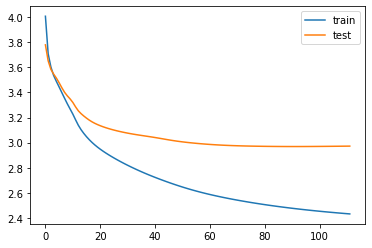

In [5]:

net = Net().to(device)
opt = th.optim.Adam(net.parameters())
l = th.nn.CrossEntropyLoss()
per_epoch = defaultdict(lambda:[])
last_save = 0
e = 0

while last_save < 20:
    per_batch = defaultdict(lambda:[])
    i = 0
    for images, labels in trainloader :
      if i == 5
      ; bre
        opt.zero_grad()
        outputs = net(images.to(device))
        loss = l(outputs, labels.to(device))
        loss.backward()
        opt.step()
        per_batch["loss"].append(loss.item()*images.size(0))
        per_batch["corr"].append(sum(th.max(outputs,1)[1].cpu()==labels))
        per_batch["n"].append(images.size(0))
    per_epoch["loss"].append(sum(per_batch["loss"])/sum(per_batch["n"]))
    per_epoch["acc"].append(sum(per_batch["corr"])/sum(per_batch["n"]))
    for images, labels in testloader :
        outputs = net(images.to(device))
        loss = l(outputs, labels.to(device))
        per_batch["tloss"].append(loss.item()*images.size(0))
        per_batch["tcorr"].append(sum(th.max(outputs,1)[1].cpu()==labels))
        per_batch["tn"].append(images.size(0))
    per_epoch["tloss"].append(sum(per_batch["tloss"])/sum(per_batch["tn"]))
    per_epoch["tacc"].append(sum(per_batch["tcorr"])/sum(per_batch["tn"]))
    print(f'epoch {e:03d} : train loss {per_epoch["loss"][-1]:.3f} acc {per_epoch["acc"][-1]:.3f} test loss {per_epoch["tloss"][-1]:.3f} acc {per_epoch["tacc"][-1]:.3f}')
    # early stopping: if we are at the best epoch (= epoch with lowest loss), save the weights
    last_save += 1; e += 1
    if per_epoch["tloss"][-1] == min(per_epoch["tloss"]):
        print("  saving network")
        th.save(net.state_dict(), 'fnet_weights.pt')
        last_save = 0
print("done training.")
# reload the best weights
net.load_state_dict(th.load('fnet_weights.pt'))
# Make plots of the training/testing losses
plt.plot(per_epoch["loss"], label="train")
plt.plot(per_epoch["tloss"], label="test")
plt.legend(loc="upper right")

Draw the loss for training and the loss for testing. Do you see the
training loss keep going down and the testing loss at some point
rising above the testing curve?

Rewrite the training loop, and instead of running over the whole
dataset, only run the first 5 minibatches. Run many more epochs. Redraw the curves
for training and testing loss. You should find that the training loss tends to 0, while the testing loss shows the nice convex pattern shown in the lecture.

One final challenge. Create a large network (at least a million parameters). Run training for a couple hundred epochs, and check the testing and training losses. 

An aside, you may find the double descent curve, where the testing loss starts off going down, goes up as expected from bias-variance, but then starts to go down again. Why this happens is still unknown, but it is commonly seen training neural networks and possibly related to the mysterious generalizability of these networks with millions of parameters. 

https://openai.com/blog/deep-double-descent/

(Note: this exact phenomena may be difficult to acheive without BatchNorm, which we will cover later, but try to train a large network to good accuracy for CIFAR100)